<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/advance_prog_cls_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Customer_Data.csv')
df.head(10)

,Name,Age,Gender,Salary,Purchased
0,John,25.0,Male,50000,Yes
1,Sarah,28.0,Female,400000,Yes
2,Mike,NaN,Male,60000,Yes
3,Anna,22.0,Female,58000,No
4,Tom,30.0,Male,54000,NaN


# K Nearest Neighbours

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
print( cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


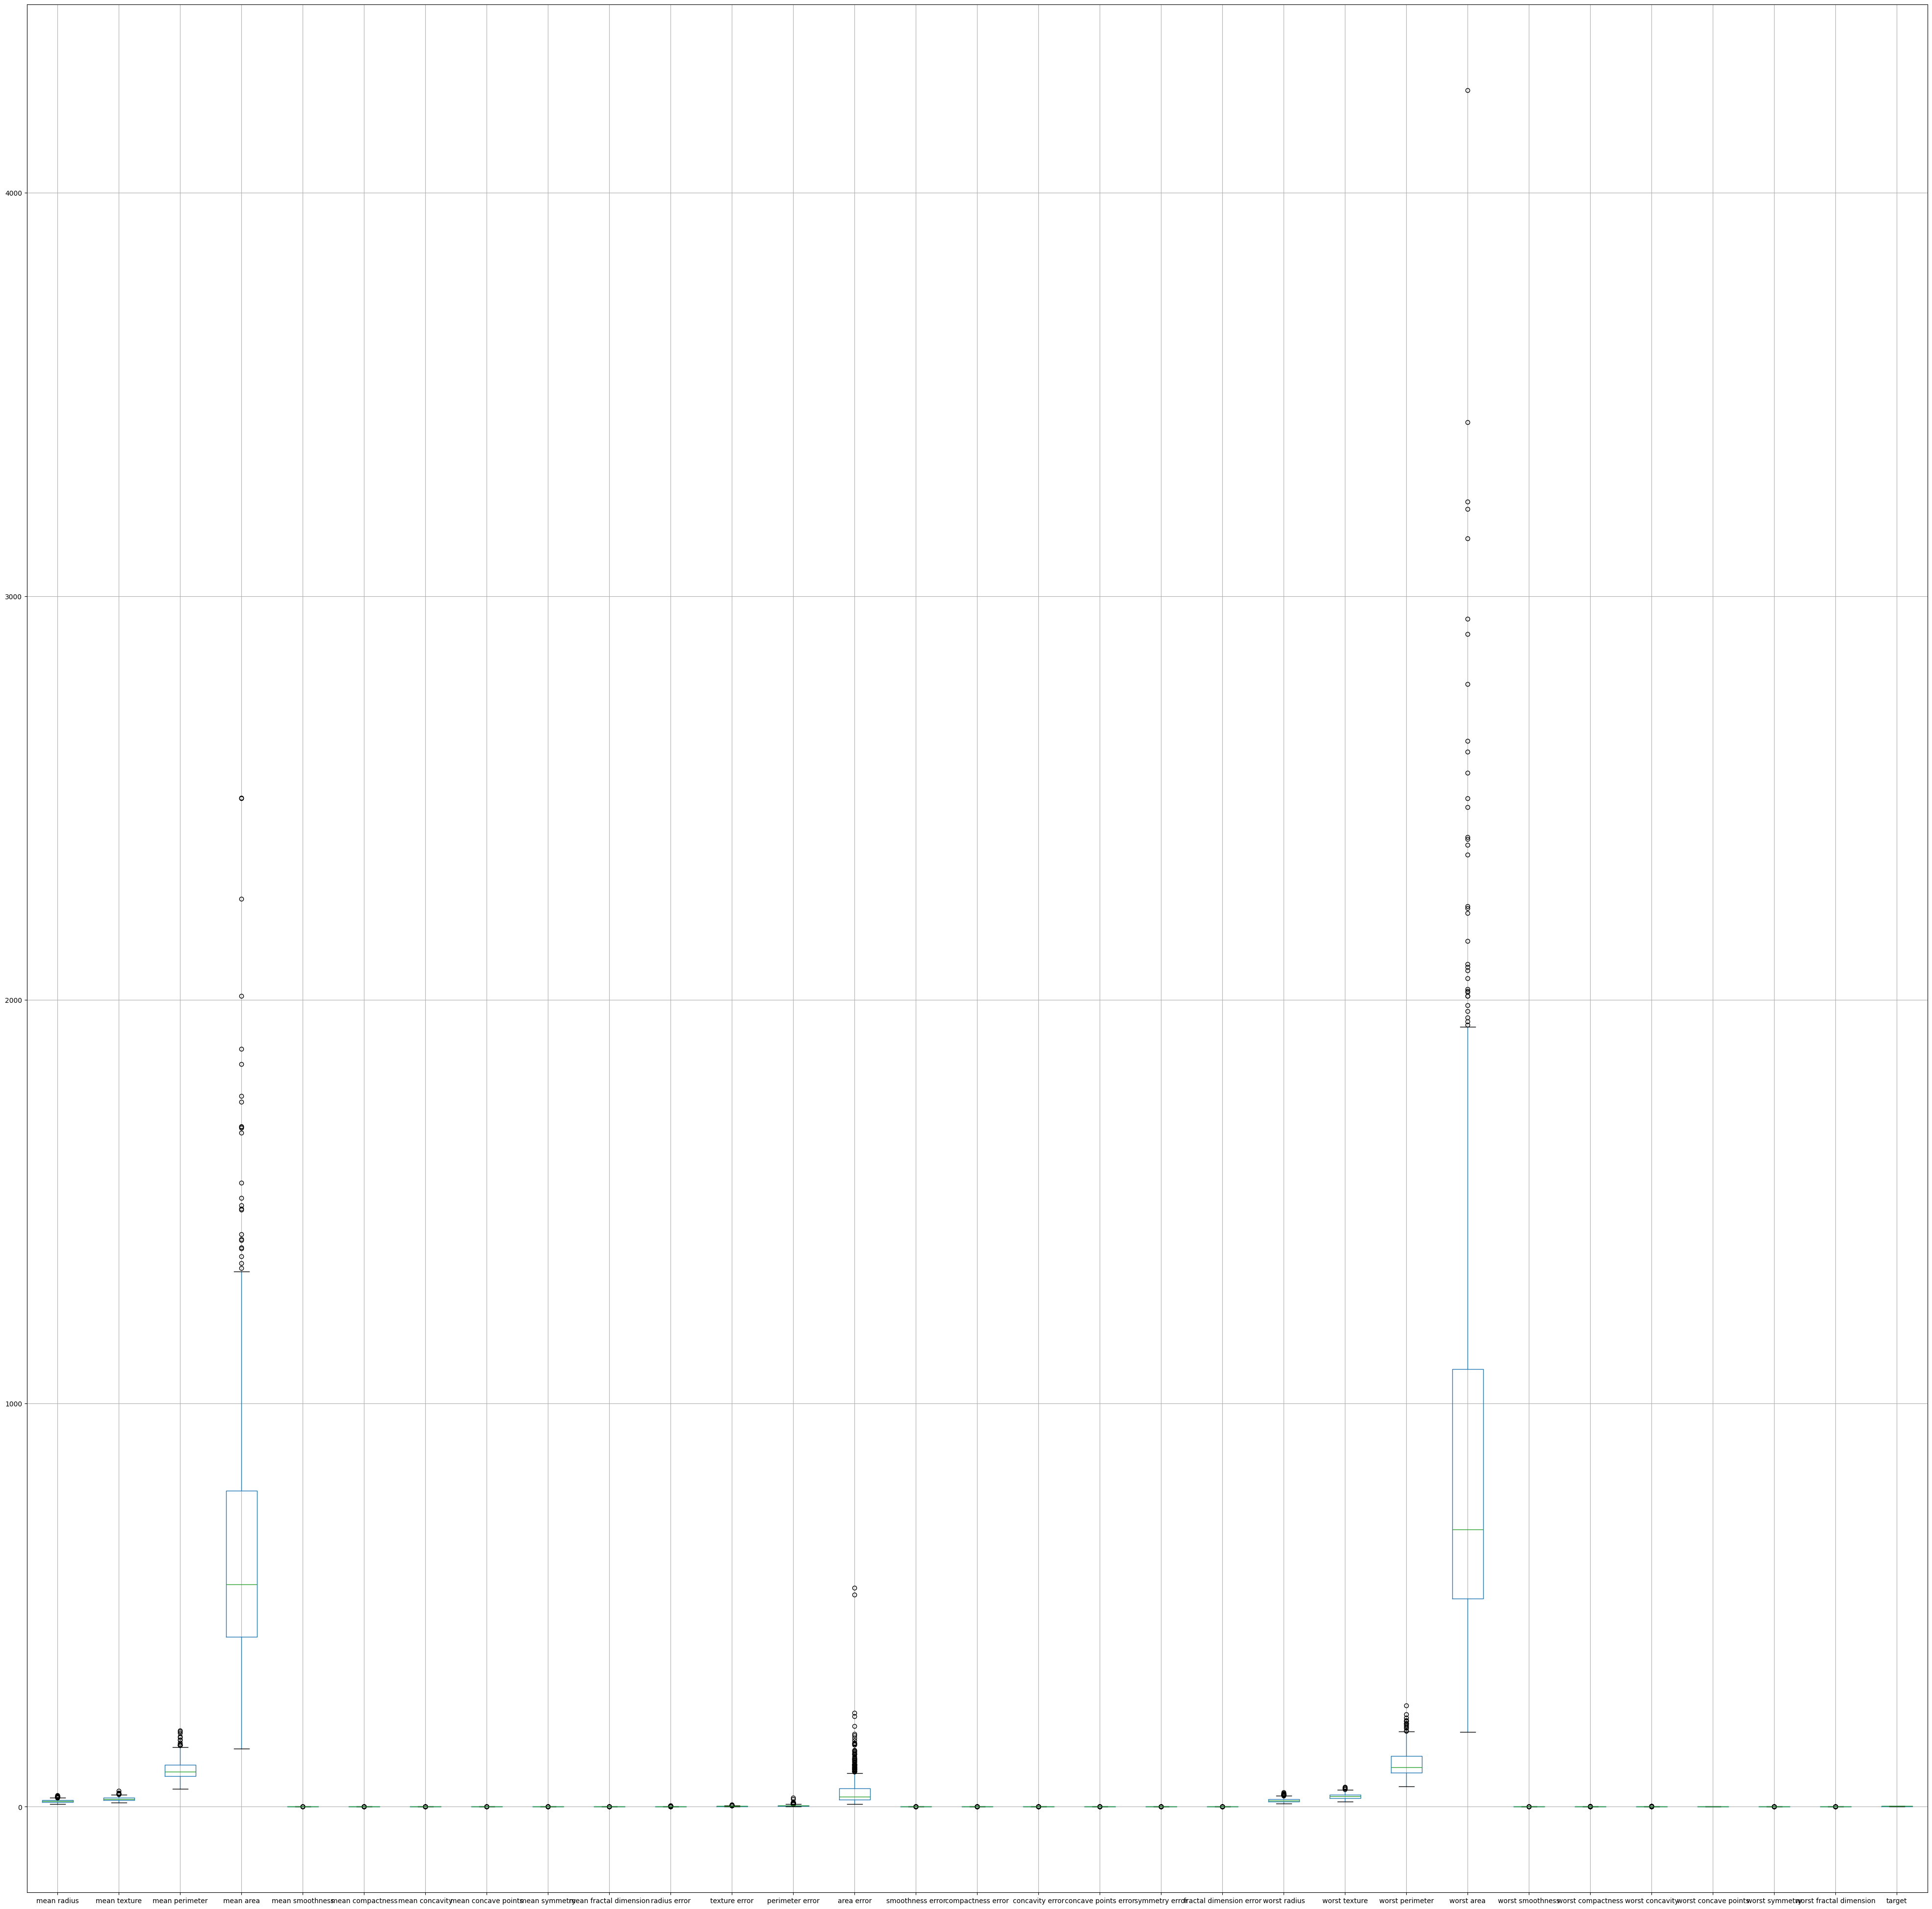

In [ ]:
cancer_df.boxplot(figsize=(50,50))
plt.show()

In [ ]:
Q1 = cancer_df['mean area'].quantile(0.25)
Q3 = cancer_df['mean area'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
cancer_df['mean area'] = cancer_df['mean area'].apply(lambda x: min(max(x, lower_bound), upper_bound))


,Name,Age,Gender,Salary,Purchased
0,John,25.0,Male,50000,Yes
1,Sarah,28.0,Female,400000,Yes
2,Mike,NaN,Male,60000,Yes
3,Anna,22.0,Female,58000,No
4,Tom,30.0,Male,54000,NaN


In [ ]:
Q1 = cancer_df['worst area'].quantile(0.25)
Q3 = cancer_df['worst area'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cancer_df['worst area'] = cancer_df['worst area'].apply(lambda x: min(max(x, lower_bound), upper_bound))
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.70,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.00,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


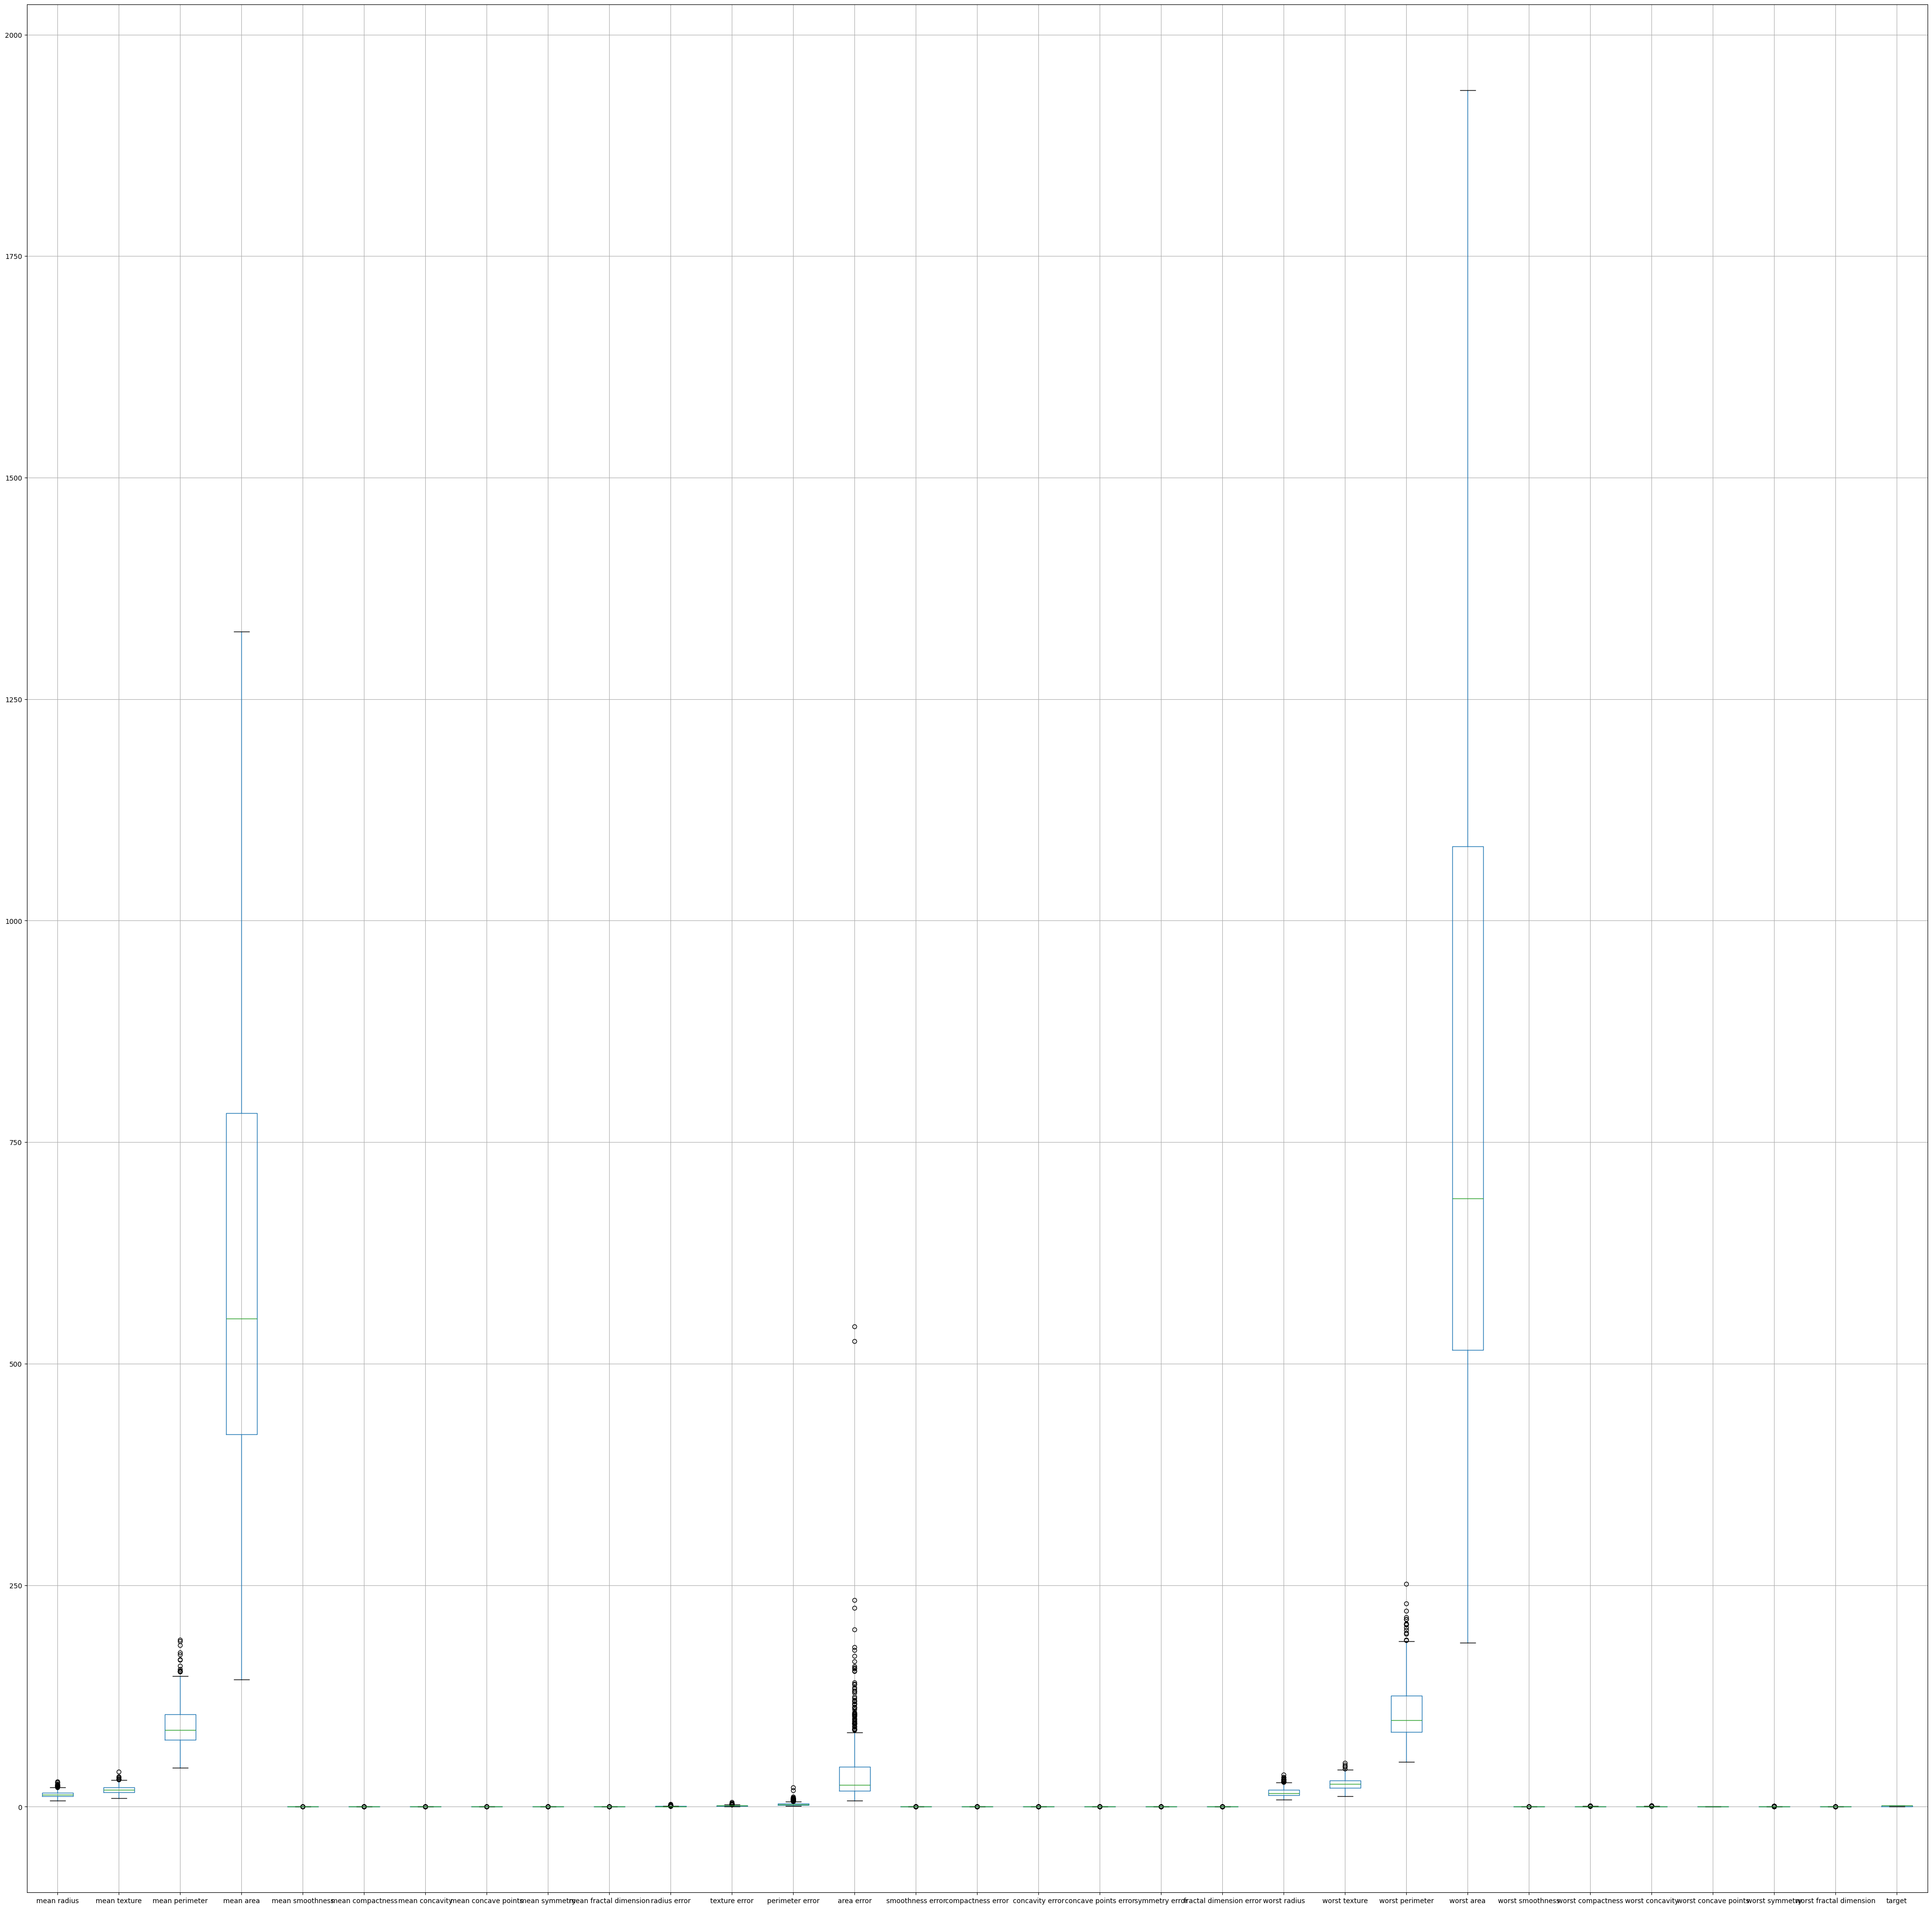

In [ ]:
cancer_df.boxplot(figsize=(50,50))
plt.show()

In [ ]:
# define target and features
x = cancer_df.drop('target', axis=1)
y = cancer_df['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# train KNN model
knn = KNeighborsClassifier(n_neighbors=5) # K as 5
knn.fit(x_train, y_train)

# make predictions
y_pred = knn.predict(x_test)

y_pred


array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1])

In [ ]:
# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy:0.9561
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# train accuracy
train_accuracy = knn.score(x_train, y_train)
print(f'Train Accuracy:{train_accuracy:.4f}')

Train Accuracy:0.9758


In [ ]:
# cross validation score
cv_scores = cross_val_score(knn, x_train, y_train, cv=5)
print(f'Cross Validation Scores:{cv_scores}')
print(f'Mean Cross Validation Score:{np.mean(cv_scores):.4f}')

Cross Validation Scores:[0.94505495 1.         0.94505495 0.97802198 0.96703297]
Mean Cross Validation Score:0.9670


Best K Value: 13


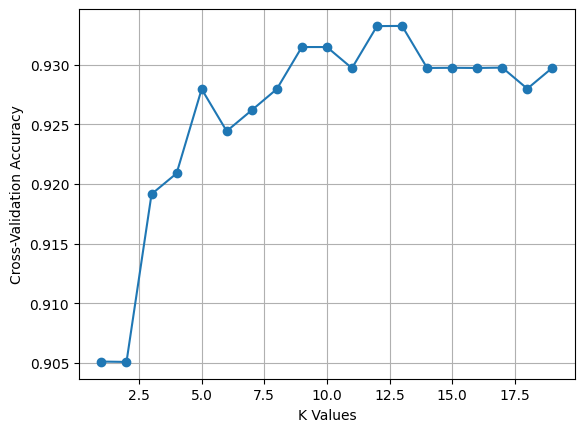

In [ ]:
k_values = list(range(1, 20))
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

best_k = k_values[np.argmax(cv_scores)]
print(f'Best K Value: {best_k}')

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K Values')
plt.ylabel('Cross-Validation Accuracy')
plt.grid()
plt.show()

In [ ]:
# train KNN model
knn = KNeighborsClassifier(n_neighbors=13) # K as 5
knn.fit(x_train, y_train)

# make predictions
y_pred = knn.predict(x_test)

y_pred

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy:.4f}')
print(classification_report(y_test, y_pred))

# train accuracy
train_accuracy = knn.score(x_train, y_train)
print(f'Train Accuracy:{train_accuracy:.4f}')

Accuracy:0.9737
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Train Accuracy:0.9714


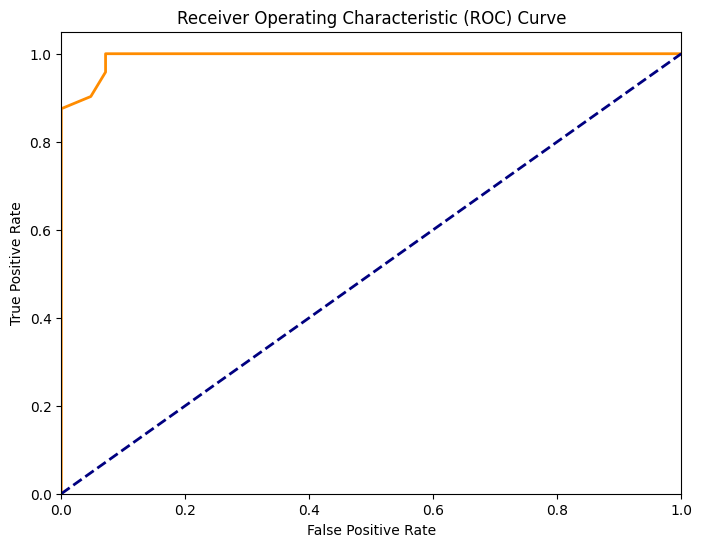

In [ ]:
# evaluation metrics ROC curve and AUC
from sklearn.metrics import roc_curve, auc

#predic probabilities
y_probs = knn.predict_proba(x_test)[:, 1] # get probs for class 1
# compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # area under the curve

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### Performace metrics

1)Accuracy

2) Precition

3) Recall

4) F1 score
5) ROC Curve


Fro regression ptoblems we use
1) Mean absolute Error
2)Mean Squared Error
3)Root mean Squared Error
R Square Score (Co Efficient of Determination)



Improvements

1) Dimensionality reduction - apply PCA, feature selection techniques
2) Try different distance metrics
3) Experiments with Weighted KNN
    - when the data points are uniformly distributed
    - when you expect closer neighbours to be more accureate predictors
    - when these is noise or verlapping classes
    - knn_weighted = KneighboursClassifier(n_neig..=, weights='distance')

4) Feature selection - corr matrix, feature importance using Mutual information, Select K best feature(Univariate statistics)


In [ ]:
# Euclidean distance(default) - dist = sqrt((x1 -x1)^2 + (y1 -y2)^2 + ..)

knn_euc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_euc.fit(x_train, y_train)

#Manhattan distance - dist = |x1-x2| + |y1 -y2|
knn_man = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
knn_man.fit(x_train, y_train)

# Chebyshev distance (L infinity disttance) - dist = max(|x1-x2| , |y1 -y2|)
knn_l_inf = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn_l_inf.fit(x_train, y_train)

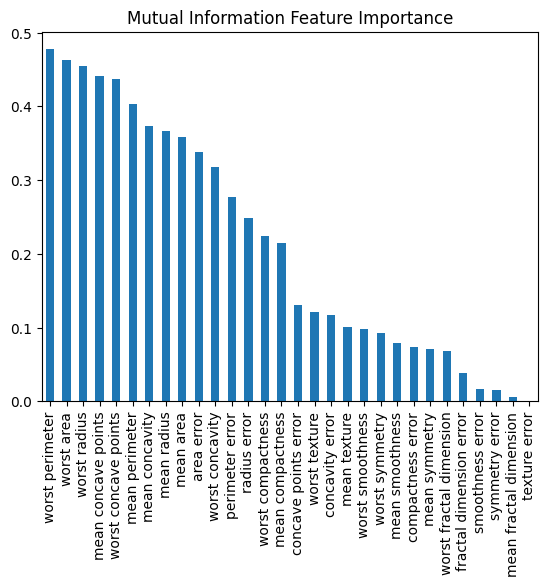

In [ ]:
# feature importance using mutual information
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x, y)
mutual_info
mi_series = pd.Series(mutual_info, index=x.columns).sort_values(ascending=False)

#plot feature importance
mi_series.plot(kind='bar')
plt.title('Mutual Information Feature Importance')

plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest

selctor = SelectKBest(mutual_info_classif, k=5) # select top 5 features
X_selected = selctor.fit_transform(x, y)
selected_Features= x.columns[selctor.get_support()]
print(selected_Features)

Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')


# Ensemble Methods in Machine learning

 1 - Bagging
 2 - boosting
 3 - stacking

# Random Forest (bagging)

In [60]:
# california housing dataset - Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
#load data
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [65]:
california_df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


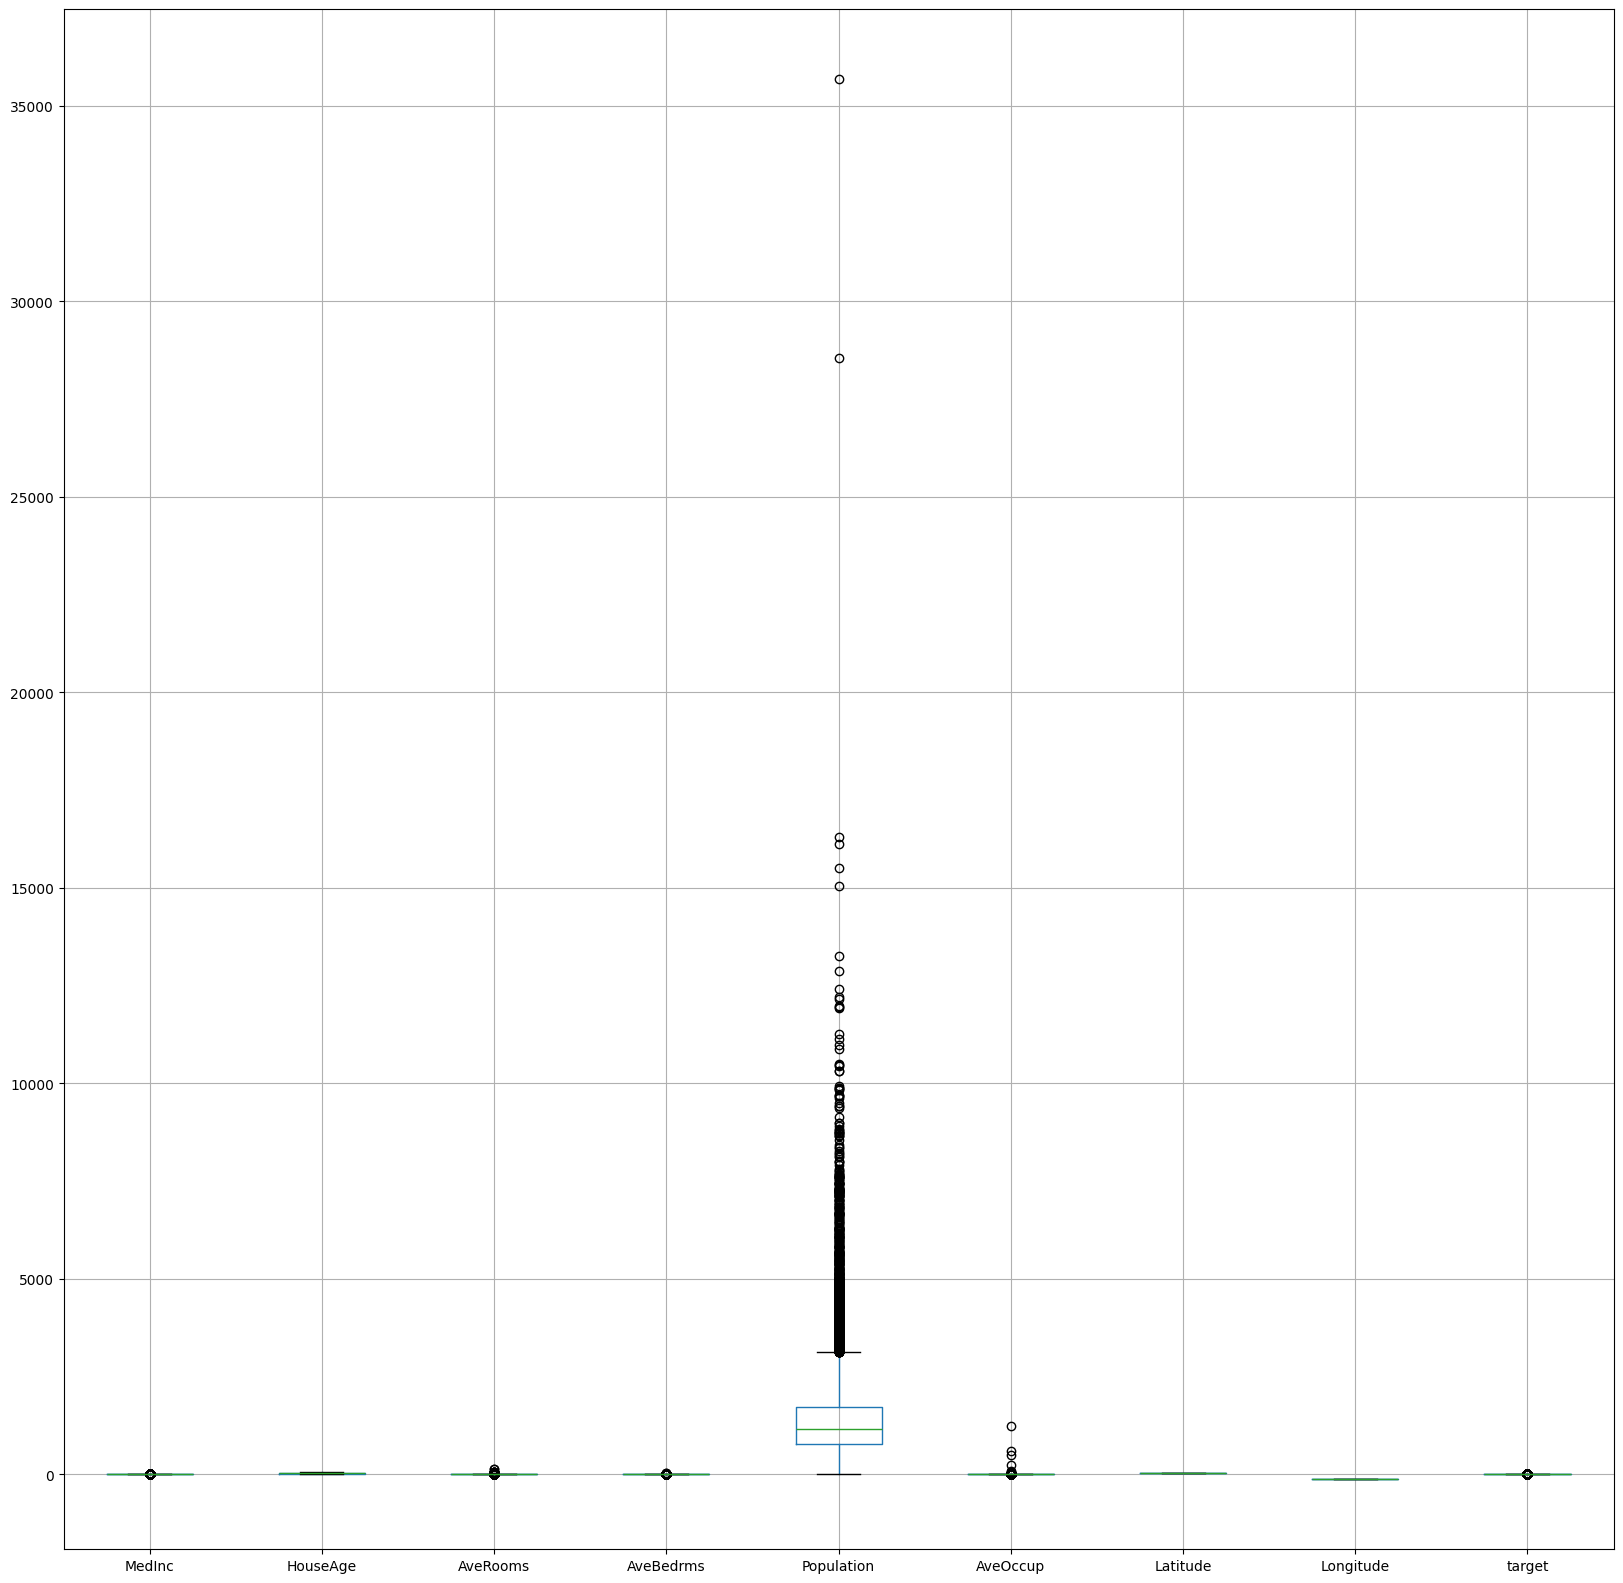

In [66]:
california_df.boxplot(figsize=(20,20))
plt.show()

In [67]:
Q1 = california_df['Population'].quantile(0.25)
Q3 = california_df['Population'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
california_df['Population'] = california_df['Population'].apply(lambda x: min(max(x, lower_bound), upper_bound))
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


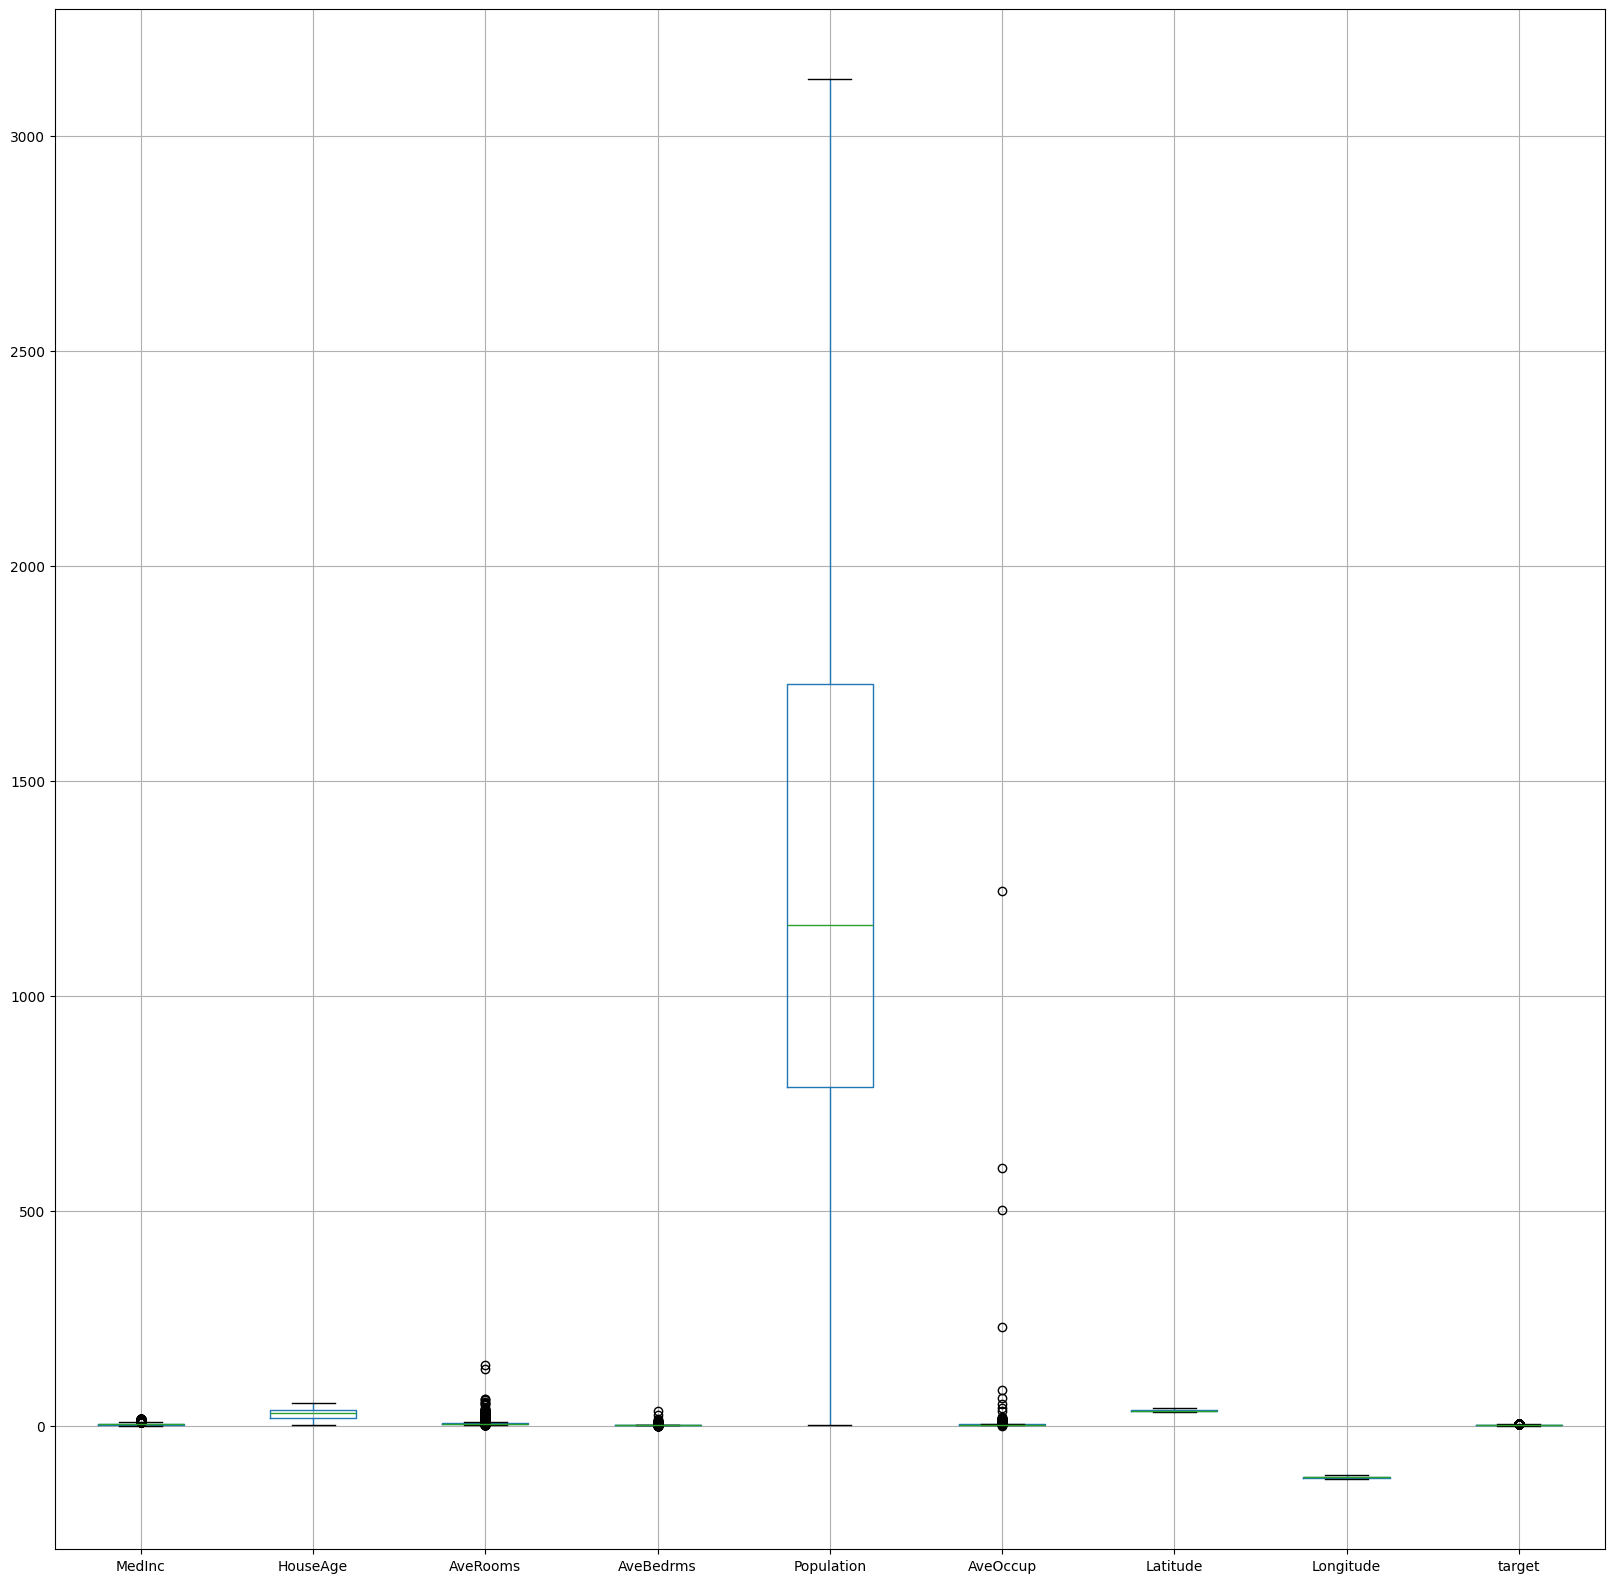

In [68]:
california_df.boxplot(figsize=(20,20))
plt.show()

In [69]:
# define target and features
X = california_df.drop('target', axis=1)
y = california_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [70]:
# model with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model
rf_model.fit(X_train, y_train)

# prediction
y_pred = rf_model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

#R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.2553684927247781
R-squared Score: 0.8051230593157366


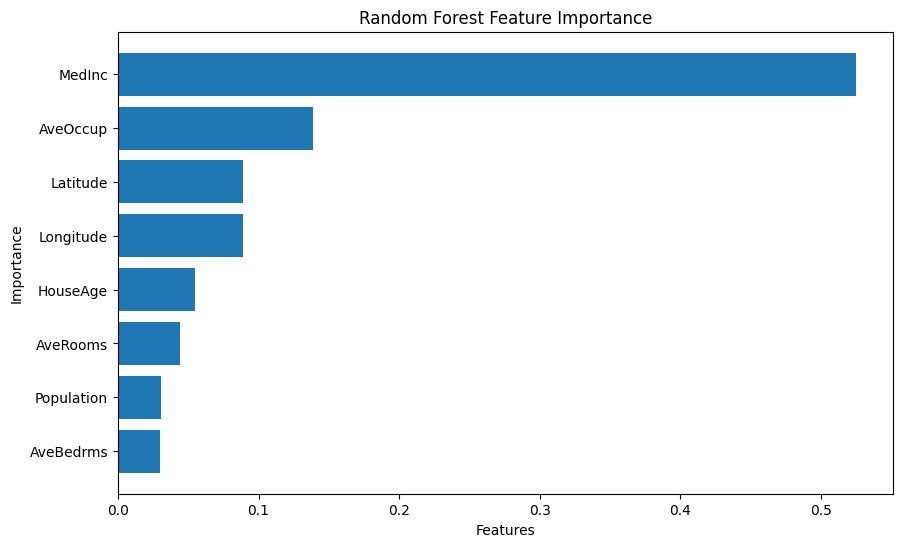

In [75]:
# Feature importance
importances = rf_model.feature_importances_
#convert to DF
imp_Df = pd.DataFrame({'Feature': california.feature_names, 'Importance': importances})
imp_Df = imp_Df.sort_values(by='Importance', ascending=False)

# plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(imp_Df['Feature'], imp_Df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

Improvements

1) Increase the number of trees
2) Feature selection - remove less important features
3) Hyper parameter tuning with grid search
      param_grid= {
        n_estimatesr
        max_depth
        min_sample_split
        min_sample_leaf
      }
4) try feaure engg
5) use other advanced ensemble

### Gradinet Boosting Machines(GBM)


In [76]:
from sklearn.datasets import load_breast_cancer
from xgboost import XGBClassifier
# Other LightGBM, CatBoost, Histgradient boosting

#load data
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [77]:
Q1 = cancer_df['mean area'].quantile(0.25)
Q3 = cancer_df['mean area'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cancer_df['mean area'] = cancer_df['mean area'].apply(lambda x: min(max(x, lower_bound), upper_bound))
Q1 = cancer_df['worst area'].quantile(0.25)
Q3 = cancer_df['worst area'].quantile(0.75)

# calculate IQR
IQR = Q3 - Q1

# define lower and upper bounds - values outside is considerd as outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cancer_df['worst area'] = cancer_df['worst area'].apply(lambda x: min(max(x, lower_bound), upper_bound))
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,1937.05,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.70,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1326.3,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.00,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [81]:
# define target and feature
X = cancer_df.drop('target', axis=1)
y = cancer_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42) # learning_rate hyperparameter that control the step size at each iteration while updating the model
xgb_model.fit(X_train, y_train)

# prediction
y_pred = xgb_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy:{accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy:0.9474
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Stacking

In [83]:
# wine data
from sklearn.datasets import load_wine
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# load data
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target
wine_df.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [84]:
wine_df.isnull().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


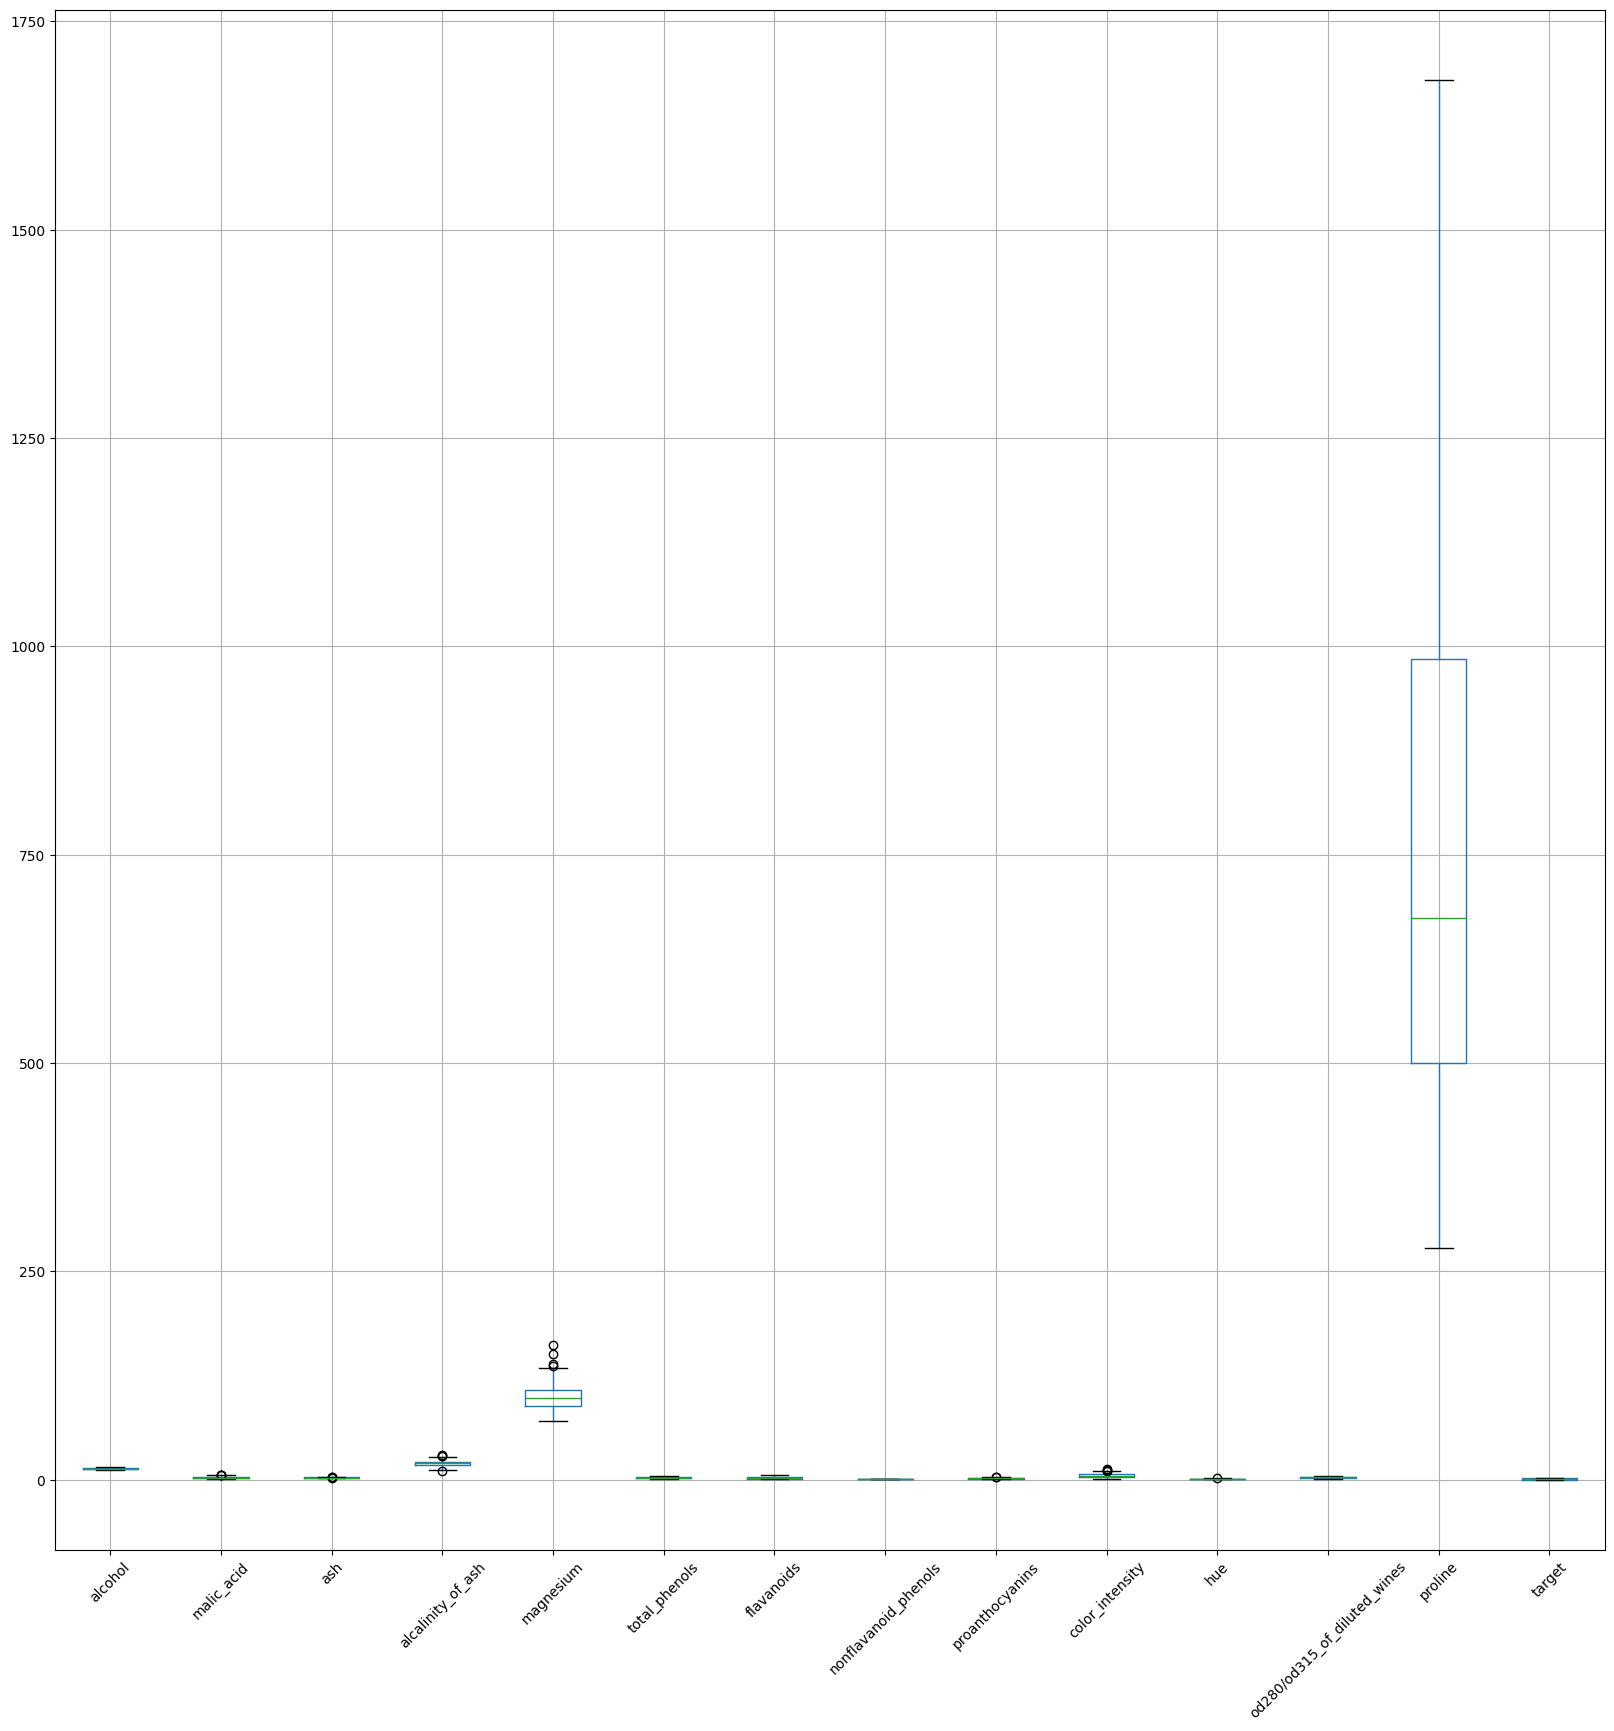

In [86]:
wine_df.boxplot(figsize=(20,20))
plt.xticks(rotation=45)
plt.show()

In [92]:
# target and feature
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# define the base models - DT, SVM, LR
estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),  # max_iter = max number of iterations to minimize the cost function
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(random_state=42))
]

# meta modal
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# stacking model
stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)
stacking_model.fit(X_train, y_train)

# prediction
y_pred = stacking_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'stacking Accuracy:{accuracy:.4f}')
print(classification_report(y_test, y_pred))

meta_model.fit(X_train, y_train)

# prediction
y_pred = meta_model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Meta Accuracy:{accuracy:.4f}')
print(classification_report(y_test, y_pred))





stacking Accuracy:0.9815
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Meta Accuracy:0.9815
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Improvements
1) Optimize base learners
2) Cross validation
3) Choose a strong final estimators (meta modal)
4) Increase data size

# Unsupervised learning - clustering

In [97]:
from sklearn.cluster import KMeans
import seaborn as sns

In [93]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [95]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


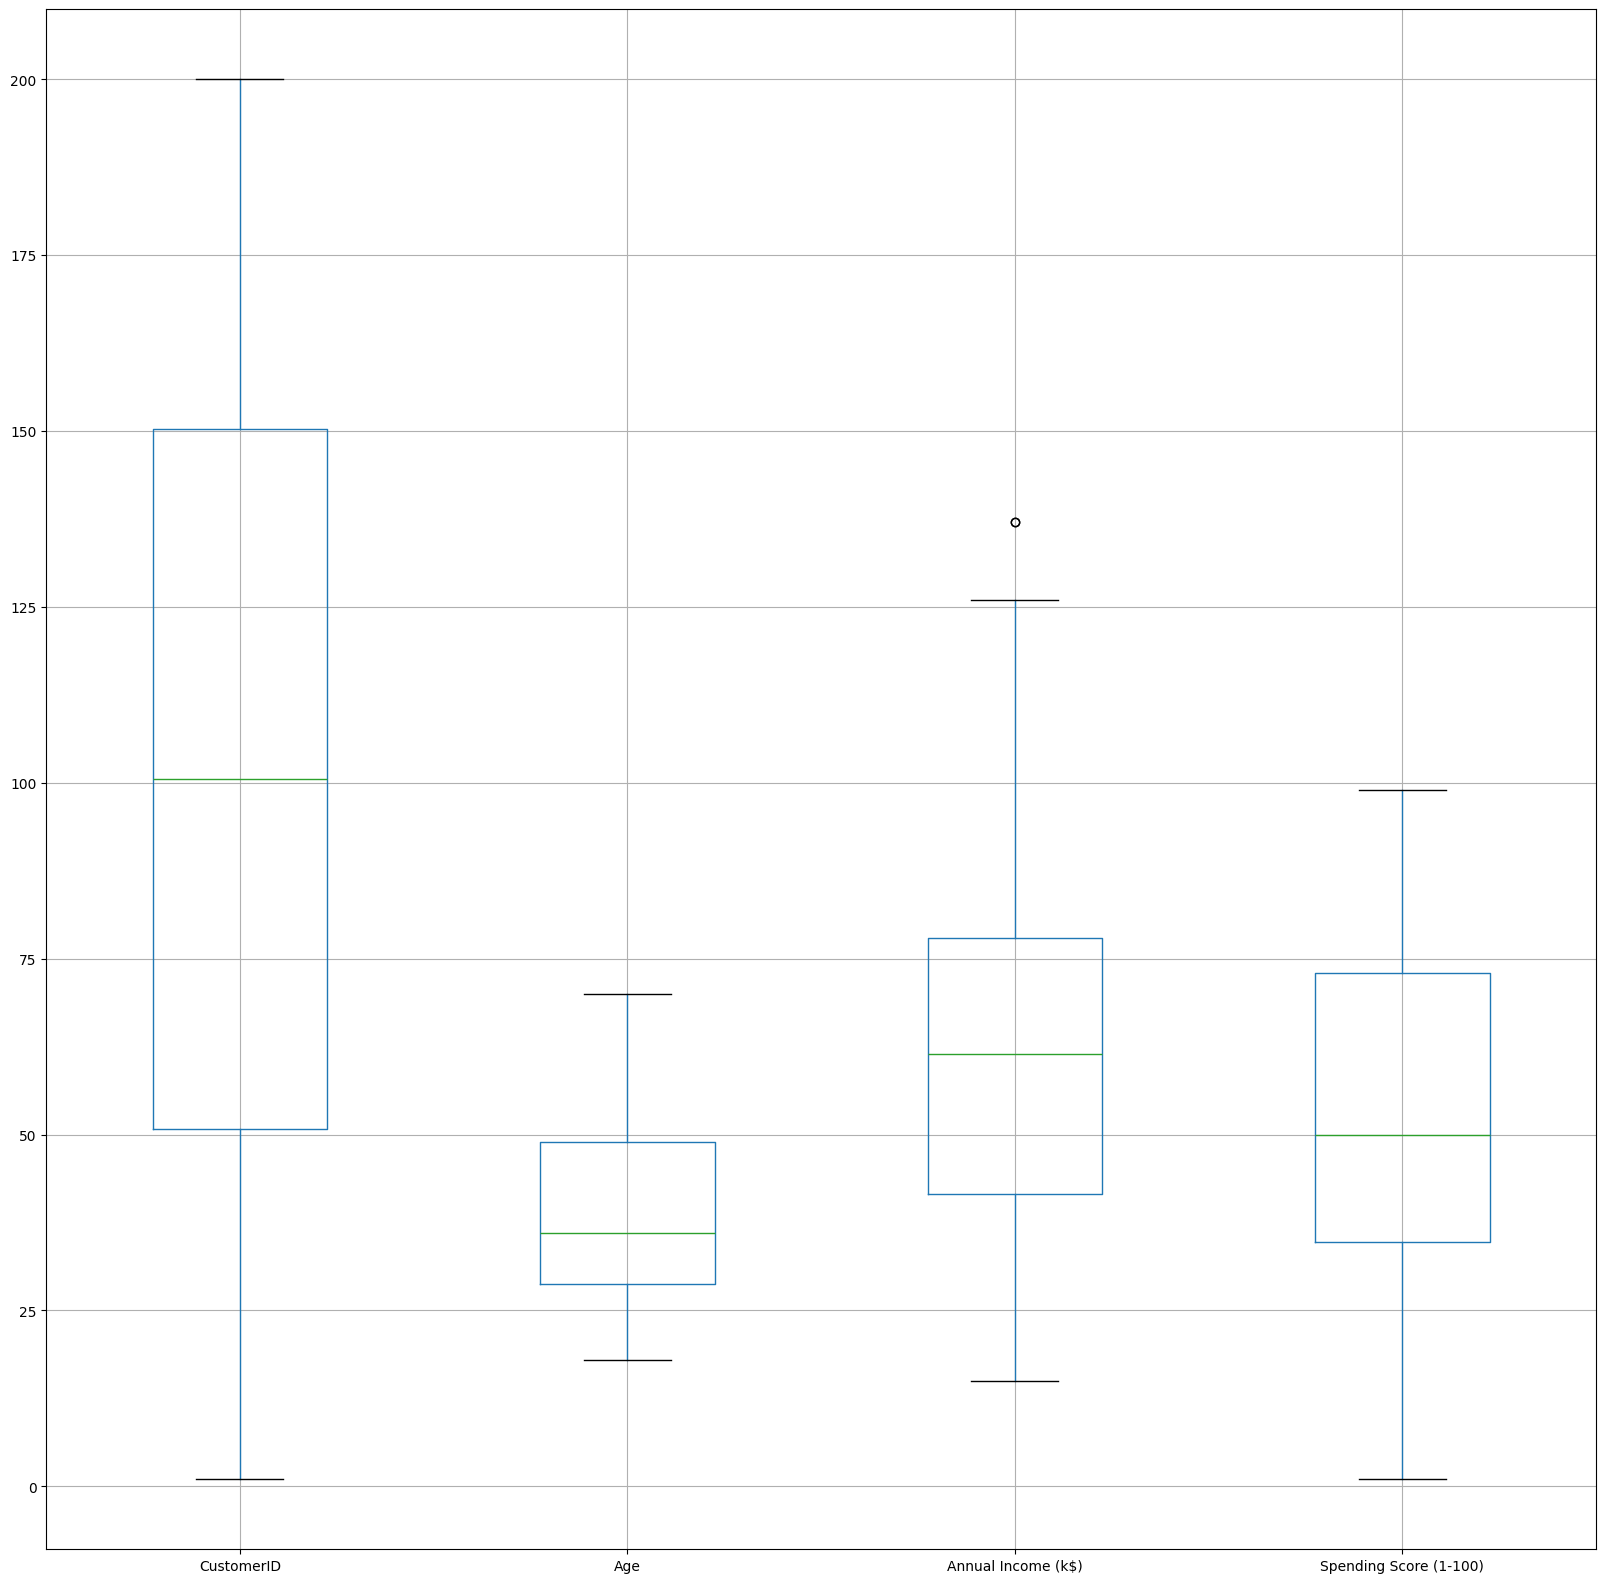

In [94]:
df.boxplot(figsize=(20,20))
plt.show()

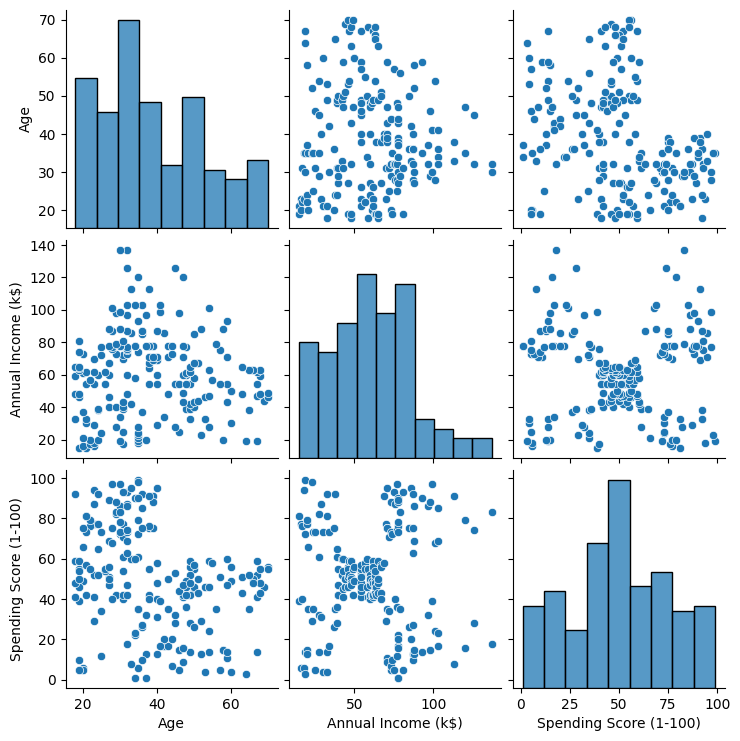

In [99]:
# distribution of age annual income and spending score
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

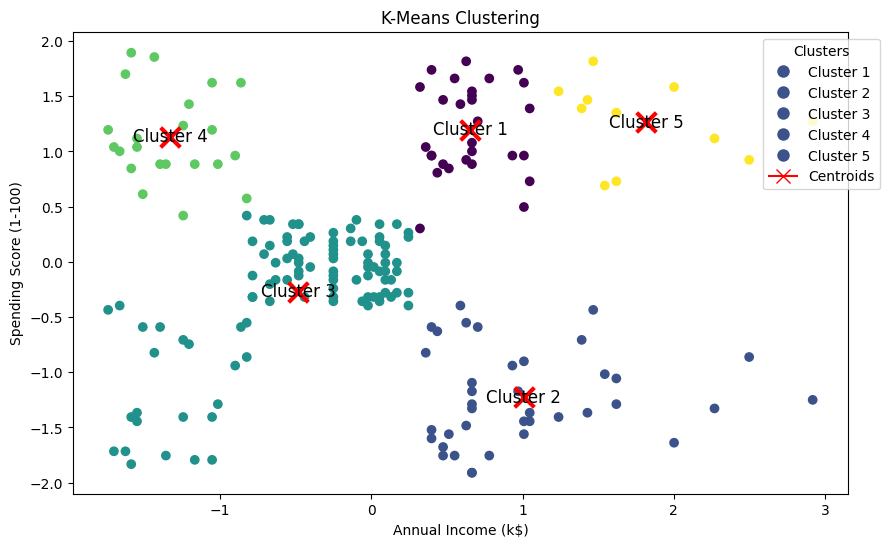

In [103]:
import matplotlib.lines as mlines
#feature selection annual income and spending
x = df[['Annual Income (k$)','Spending Score (1-100)']]

#scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

# k means
k_means = KMeans(n_clusters=5)
labels = k_means.fit_predict(x)
df['cluster'] = labels
# visualize the kmeans result
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=k_means.labels_, cmap='viridis')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='red')
#add cluster names
for i, cluster in enumerate(k_means.cluster_centers_):
    plt.text(cluster[0], cluster[1], f'Cluster {i+1}', fontsize=12, ha='center', va='center')

handles = []
# add cluster legend entries
for i in range(5):
    handles.append(mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.viridis(1/4), markersize=10, label=f'Cluster {i+1}'))

#add centroid legend entry
handles.append(mlines.Line2D([0], [0], marker='x', color='red', markersize=10, label='Centroids'))

plt.legend(handles=handles, loc='upper right', title='Clusters', bbox_to_anchor=(1.05, 1))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering')
plt.show()


In [105]:
# analyzing the cluster
cluster_summary = df.groupby('cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,77.724138,81.068966
1,87.000000,18.631579
2,47.960000,43.250000
3,25.727273,79.363636
4,108.181818,82.727273


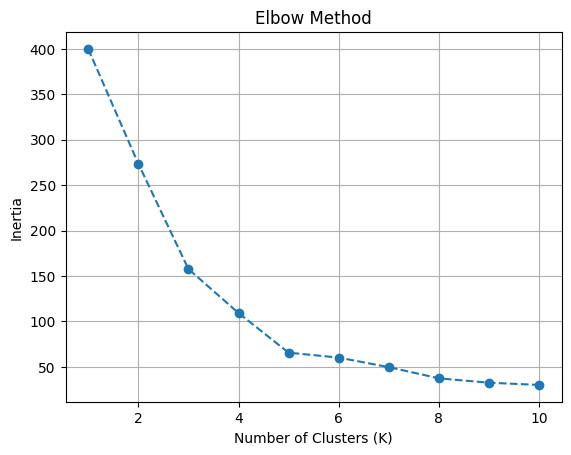

In [107]:
# elbow method to find K
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

# plot inertia
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [108]:
# silhouette score for k
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    silhouette_avg = silhouette_score(x, labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters={k}, silhouette score is {silhouette_avg}')



For n_clusters=2, silhouette score is 0.3973270007887498
For n_clusters=3, silhouette score is 0.46658474419000145
For n_clusters=4, silhouette score is 0.49434988482196784
For n_clusters=5, silhouette score is 0.5546571631111091
For n_clusters=6, silhouette score is 0.5138257534676561
For n_clusters=7, silhouette score is 0.50200146805547
For n_clusters=8, silhouette score is 0.4550112502601921
For n_clusters=9, silhouette score is 0.4566624374485964
For n_clusters=10, silhouette score is 0.44475993501732874


# DBSCAN

core point, border point, noise point

Density base clustering


In [111]:
from sklearn.cluster import DBSCAN

In [110]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


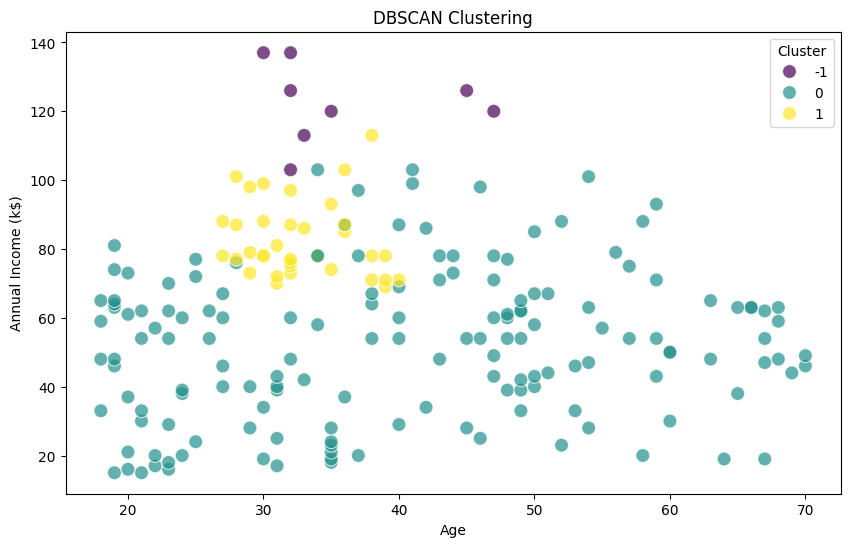

In [115]:
#feature selection annual income and spending
X = df[['Annual Income (k$)','Spending Score (1-100)']]

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dbscan clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)
df['Cluster'] = dbscan.labels_

# visualize the dbscan result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Cluster', data=df, palette='viridis', markers='o', s=100, alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('DBSCAN Clustering')
plt.show()

# Kdistance map to find eps and minsamples


# hierarchy cluster



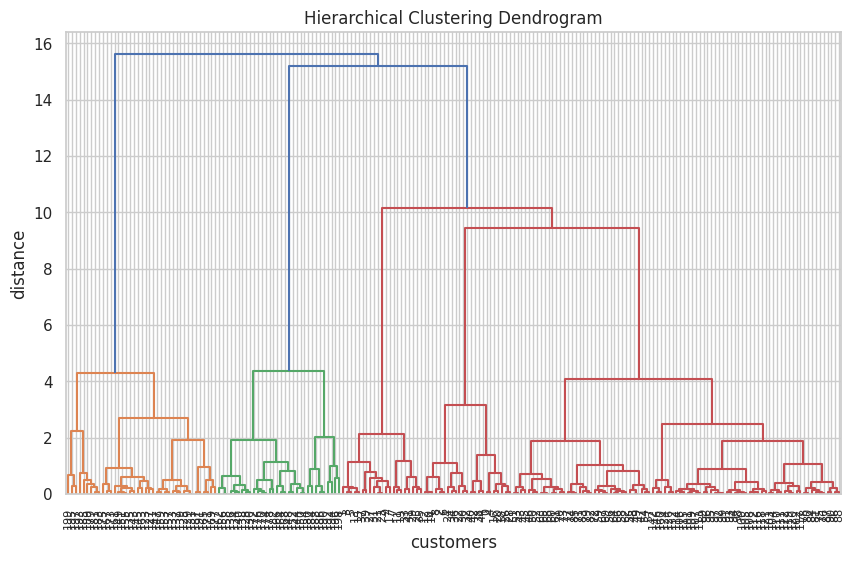

In [116]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
sns.set(style='whitegrid')
df = pd.read_csv('/content/Mall_Customers.csv')

X=df[['Annual Income (k$)','Spending Score (1-100)']]
X_scaled = scaler.fit_transform(X)

# hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

#plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('customers')
plt.ylabel('distance')
plt.show()

# identify the number of cluster, find the longest horizontal line

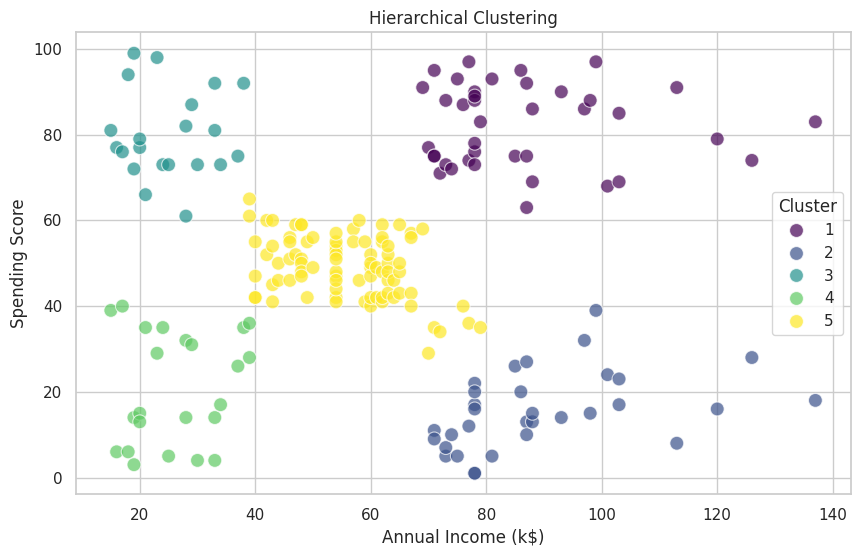

In [118]:
# apply hierclustering
n_clusters = 5
labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
df['Cluster'] = labels

#visulize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', markers='o', s=100, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Hierarchical Clustering')
plt.show()